In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good" </h3>

# 2 - Data collection and description

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.rename(columns={'Marital.Status':'MaritalStatus',
                  'Taxable.Income':'TaxableIncome',
                  'City.Population':'CityPopulation',
                  'Work.Experience':'WorkExperience'
                  },inplace=True)
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,TaxableIncome,CityPopulation,WorkExperience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad         0
MaritalStatus     0
TaxableIncome     0
CityPopulation    0
WorkExperience    0
Urban             0
dtype: int64

In [7]:
df.dtypes

Undergrad         object
MaritalStatus     object
TaxableIncome      int64
CityPopulation     int64
WorkExperience     int64
Urban             object
dtype: object

<h3 style="color:black; font-family: Arial;"> Target Column</h3>


_<span style="color:; font-family: Arial;">As given in problem statement treating those who have taxable_income <= 30000 as "Risky" and others are "Good"</span>_

In [8]:
df['Target'] = df['TaxableIncome'].apply(lambda x : "Risky" if x <=30000 else "Good")

In [9]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


# 3- Visualization

<Axes: xlabel='WorkExperience', ylabel='TaxableIncome'>

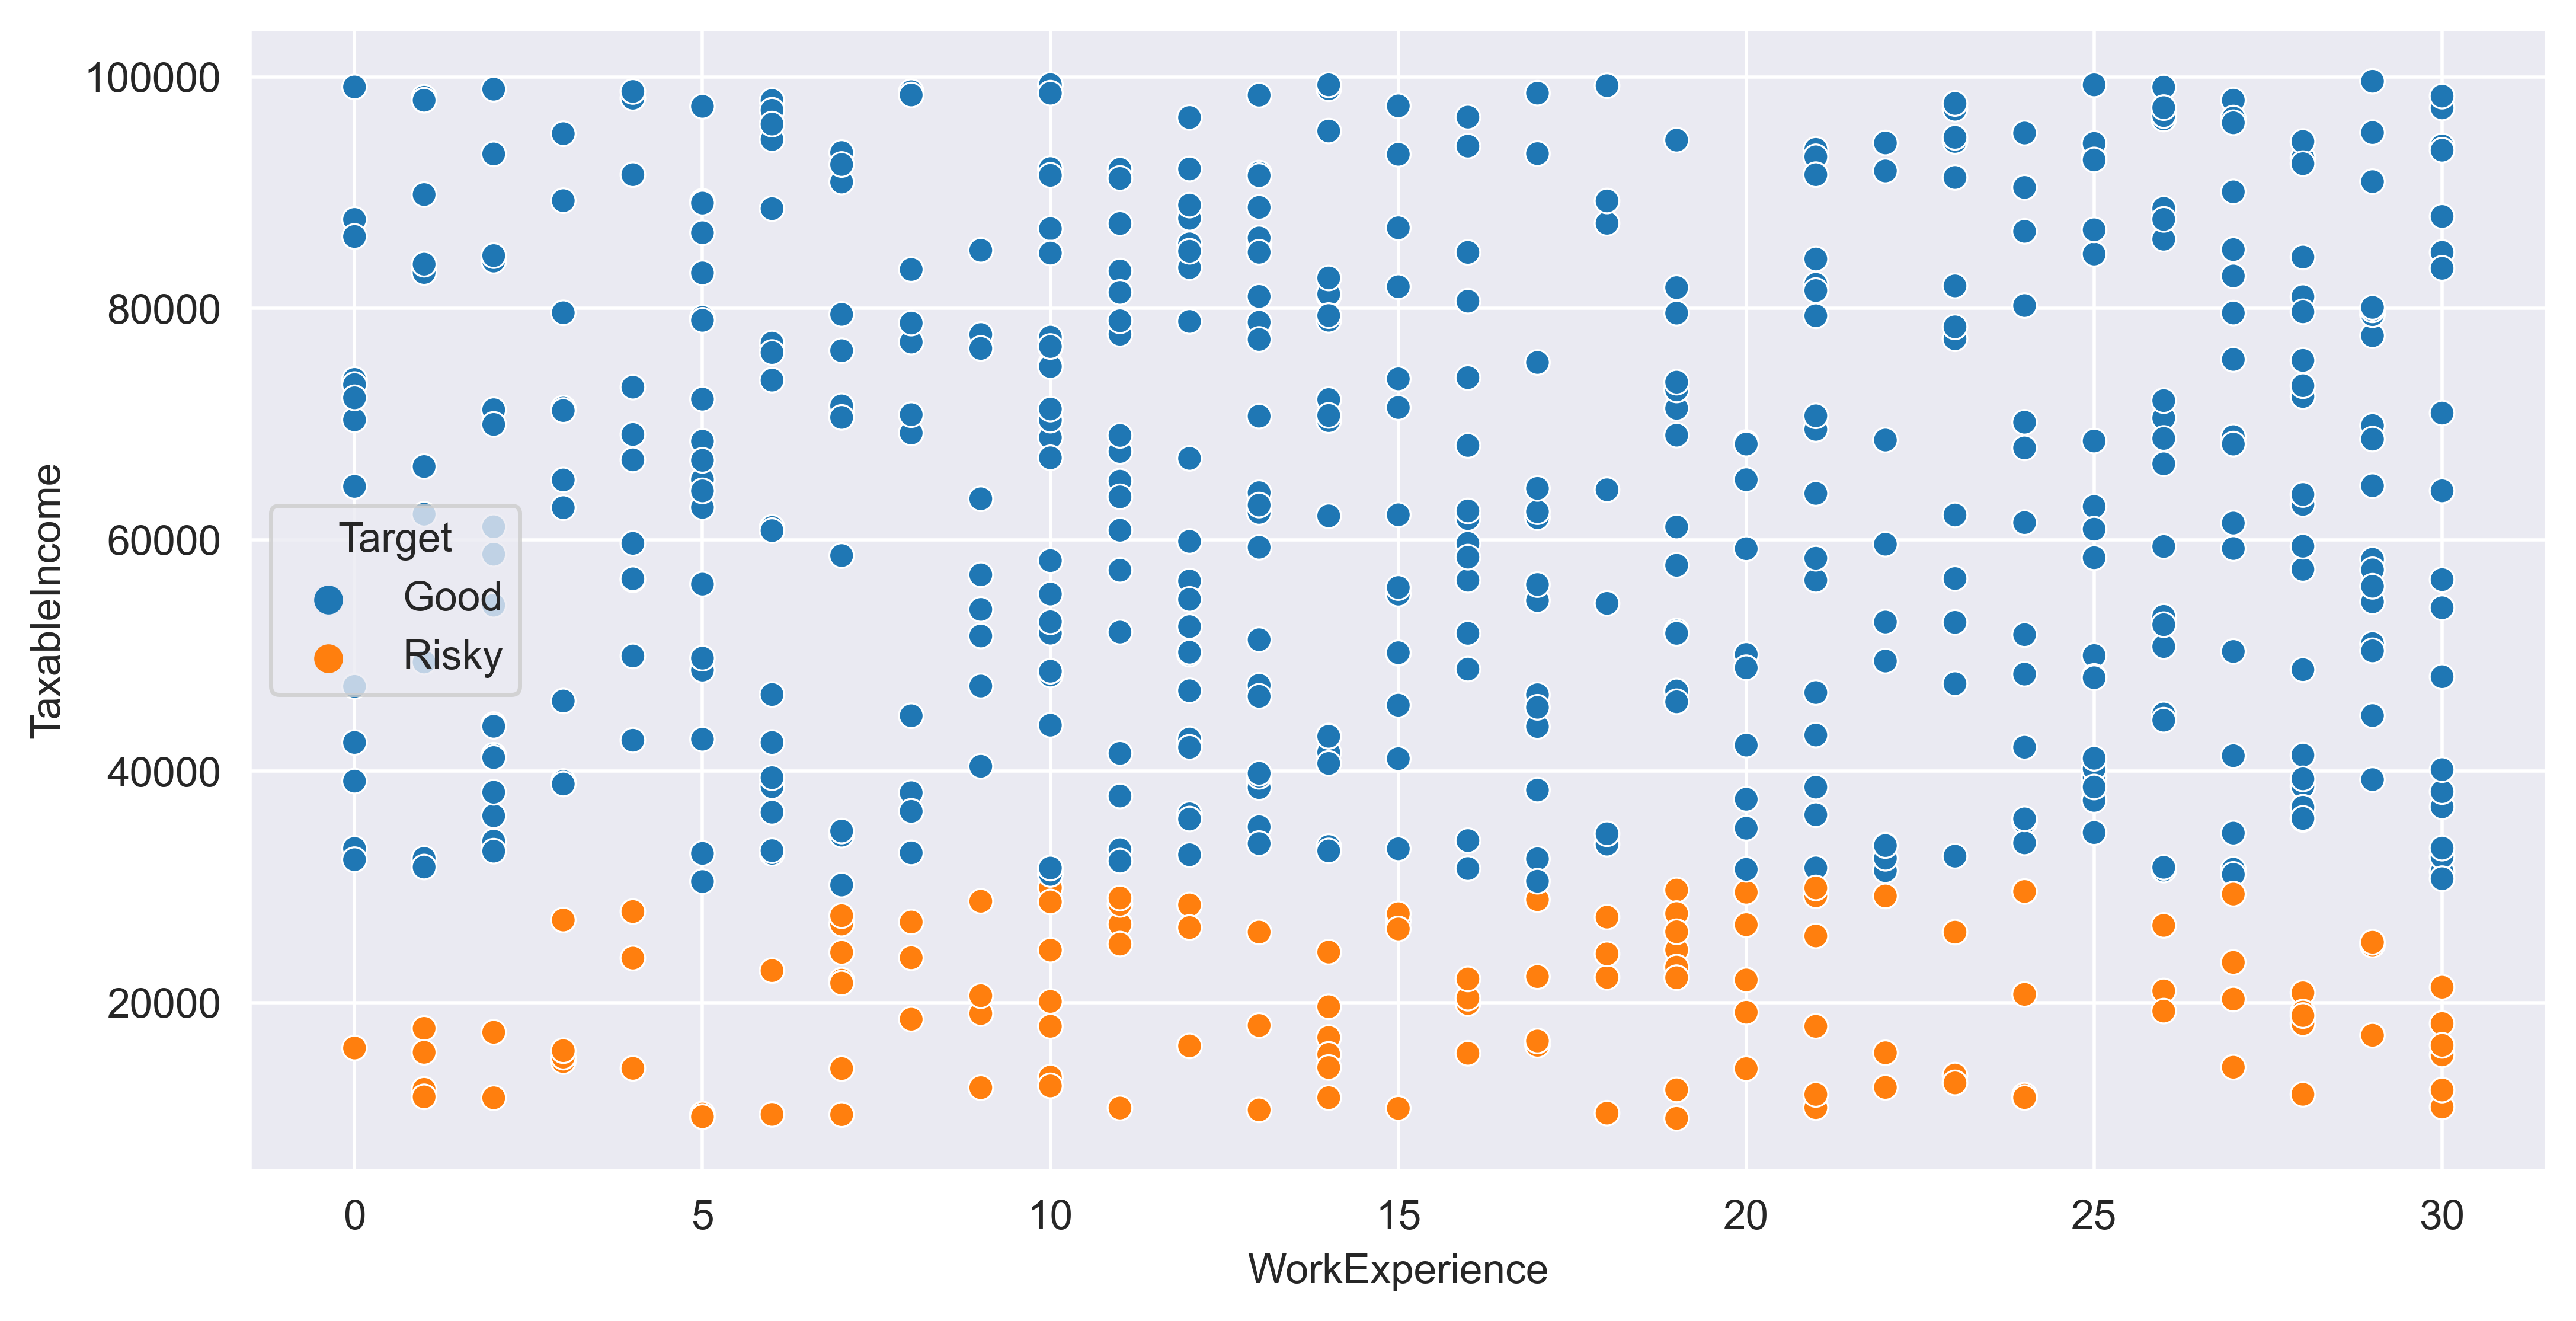

In [10]:
sns.scatterplot(x=df['WorkExperience'],y=df['TaxableIncome'],hue=df['Target'])

Text(0.5, 1.0, 'Classes count')

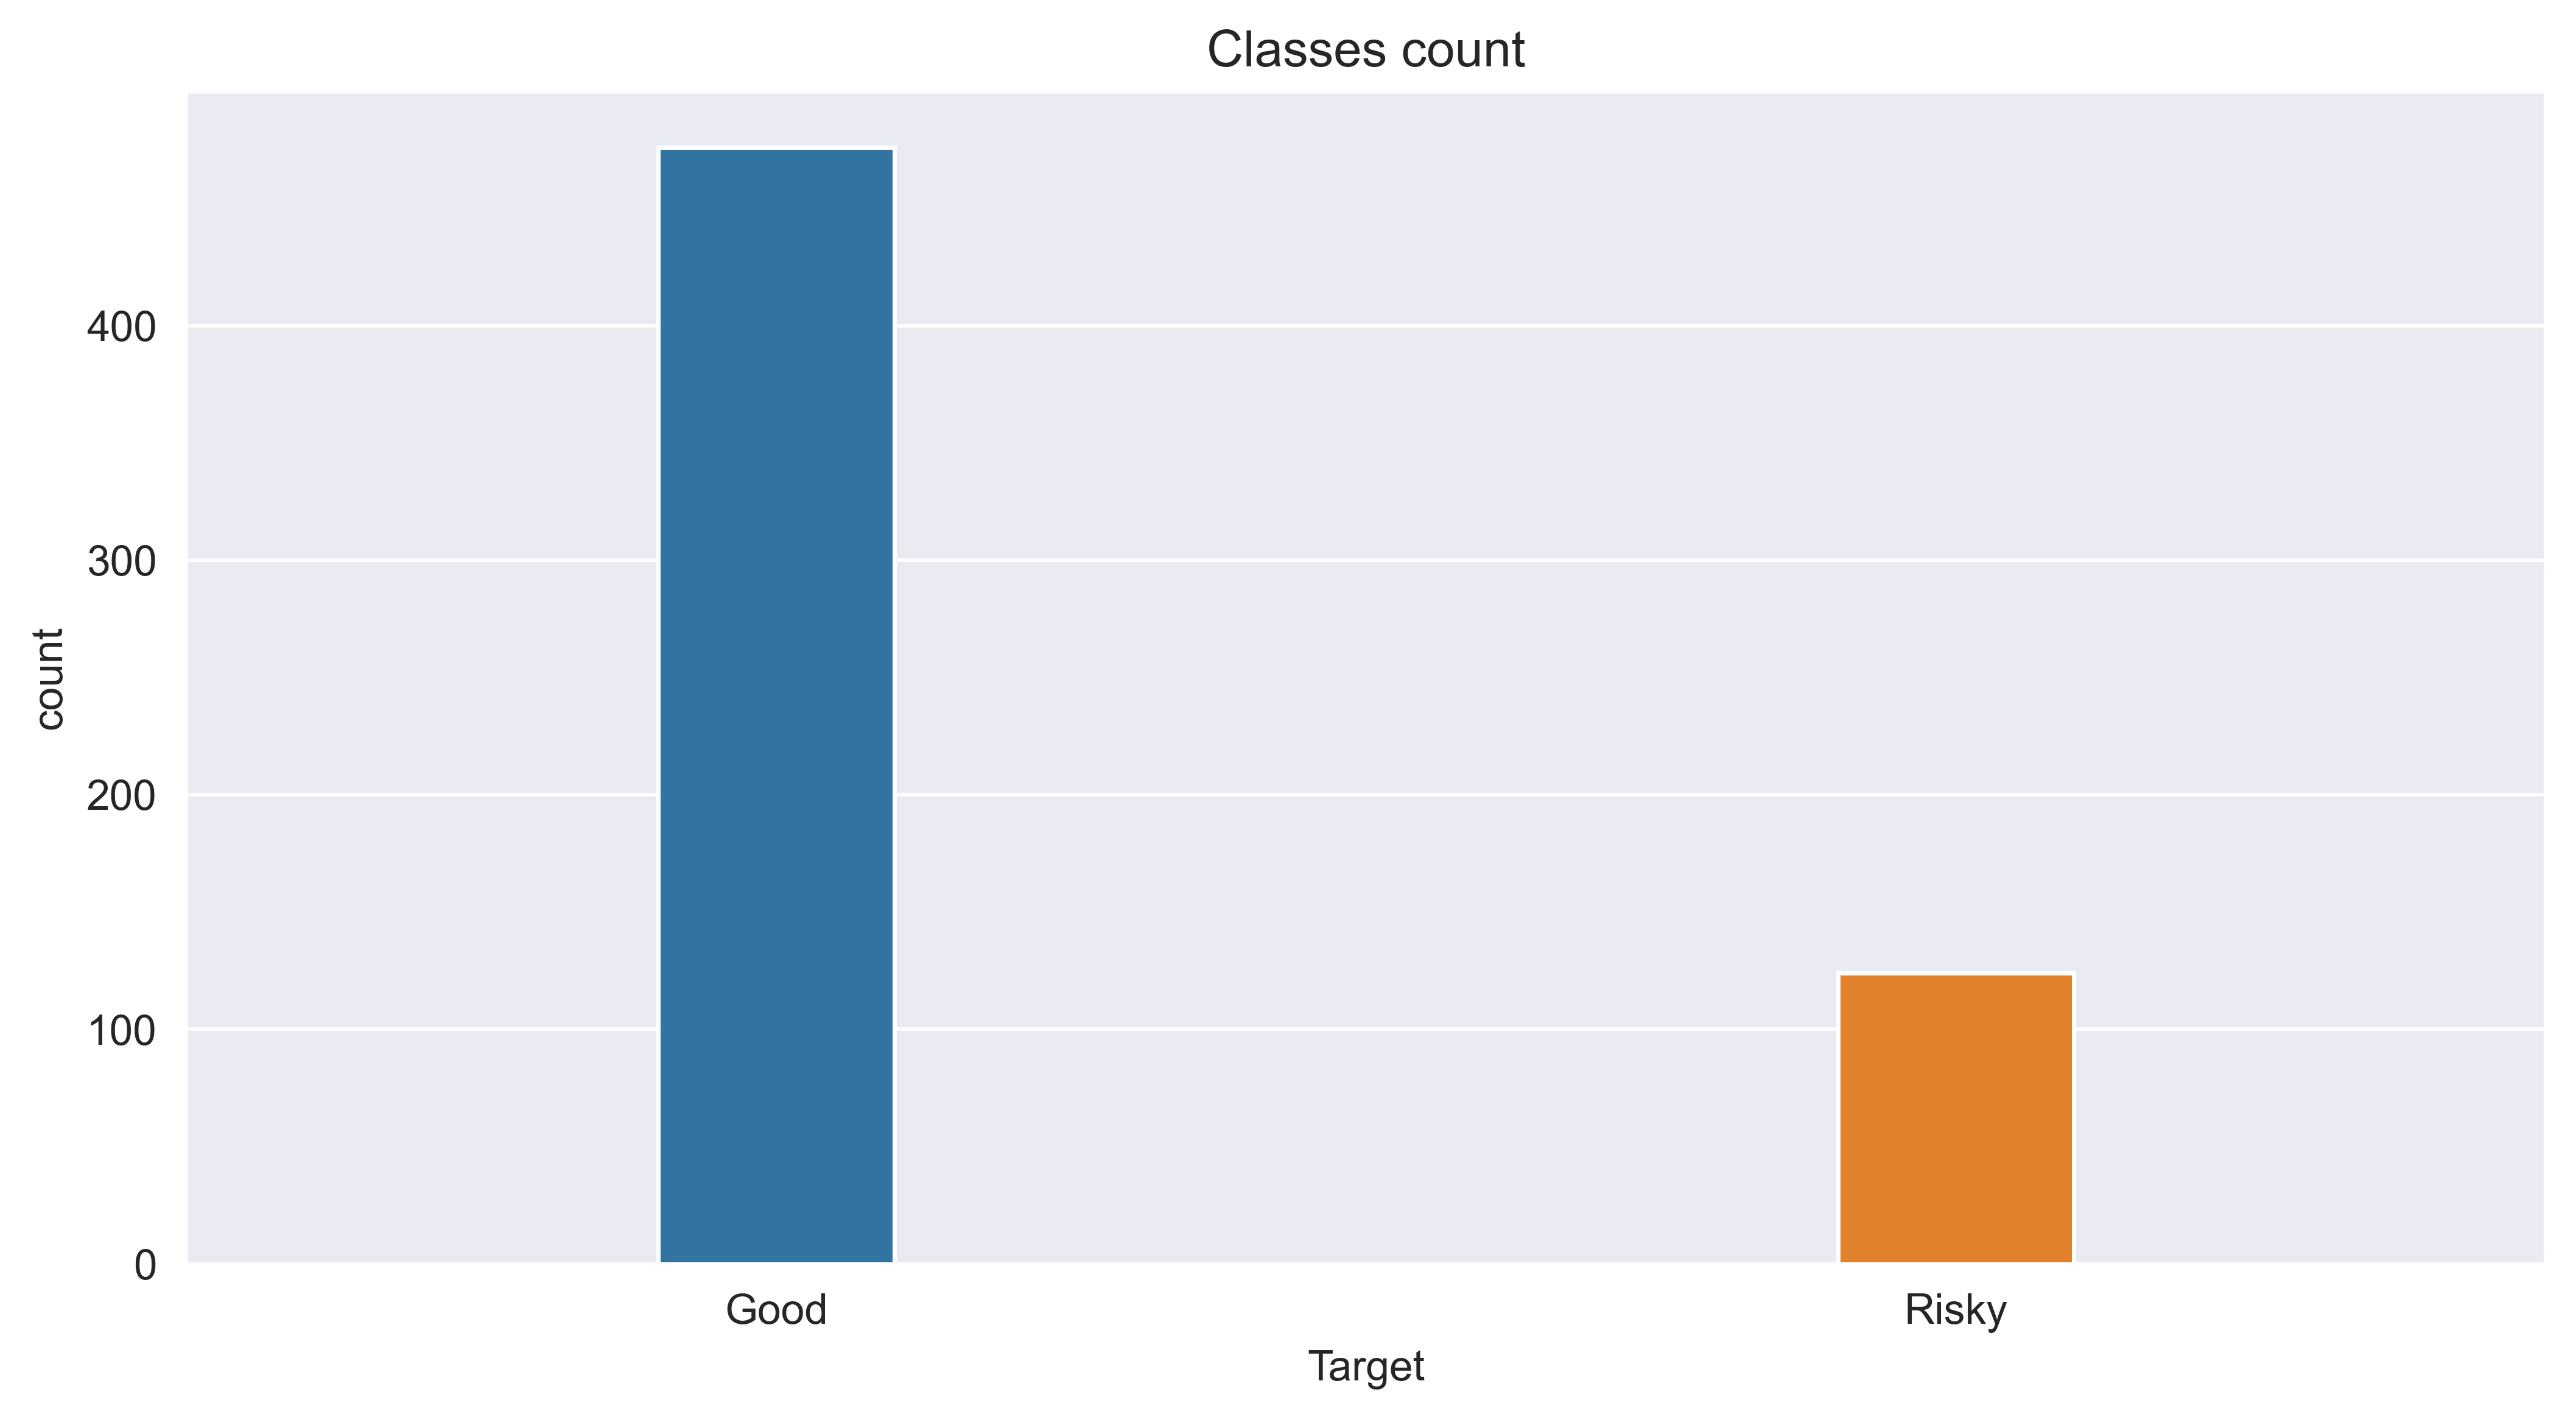

In [11]:
sns.countplot(data=df,x='Target',width=0.2)
plt.title('Classes count')

<Axes: ylabel='count'>

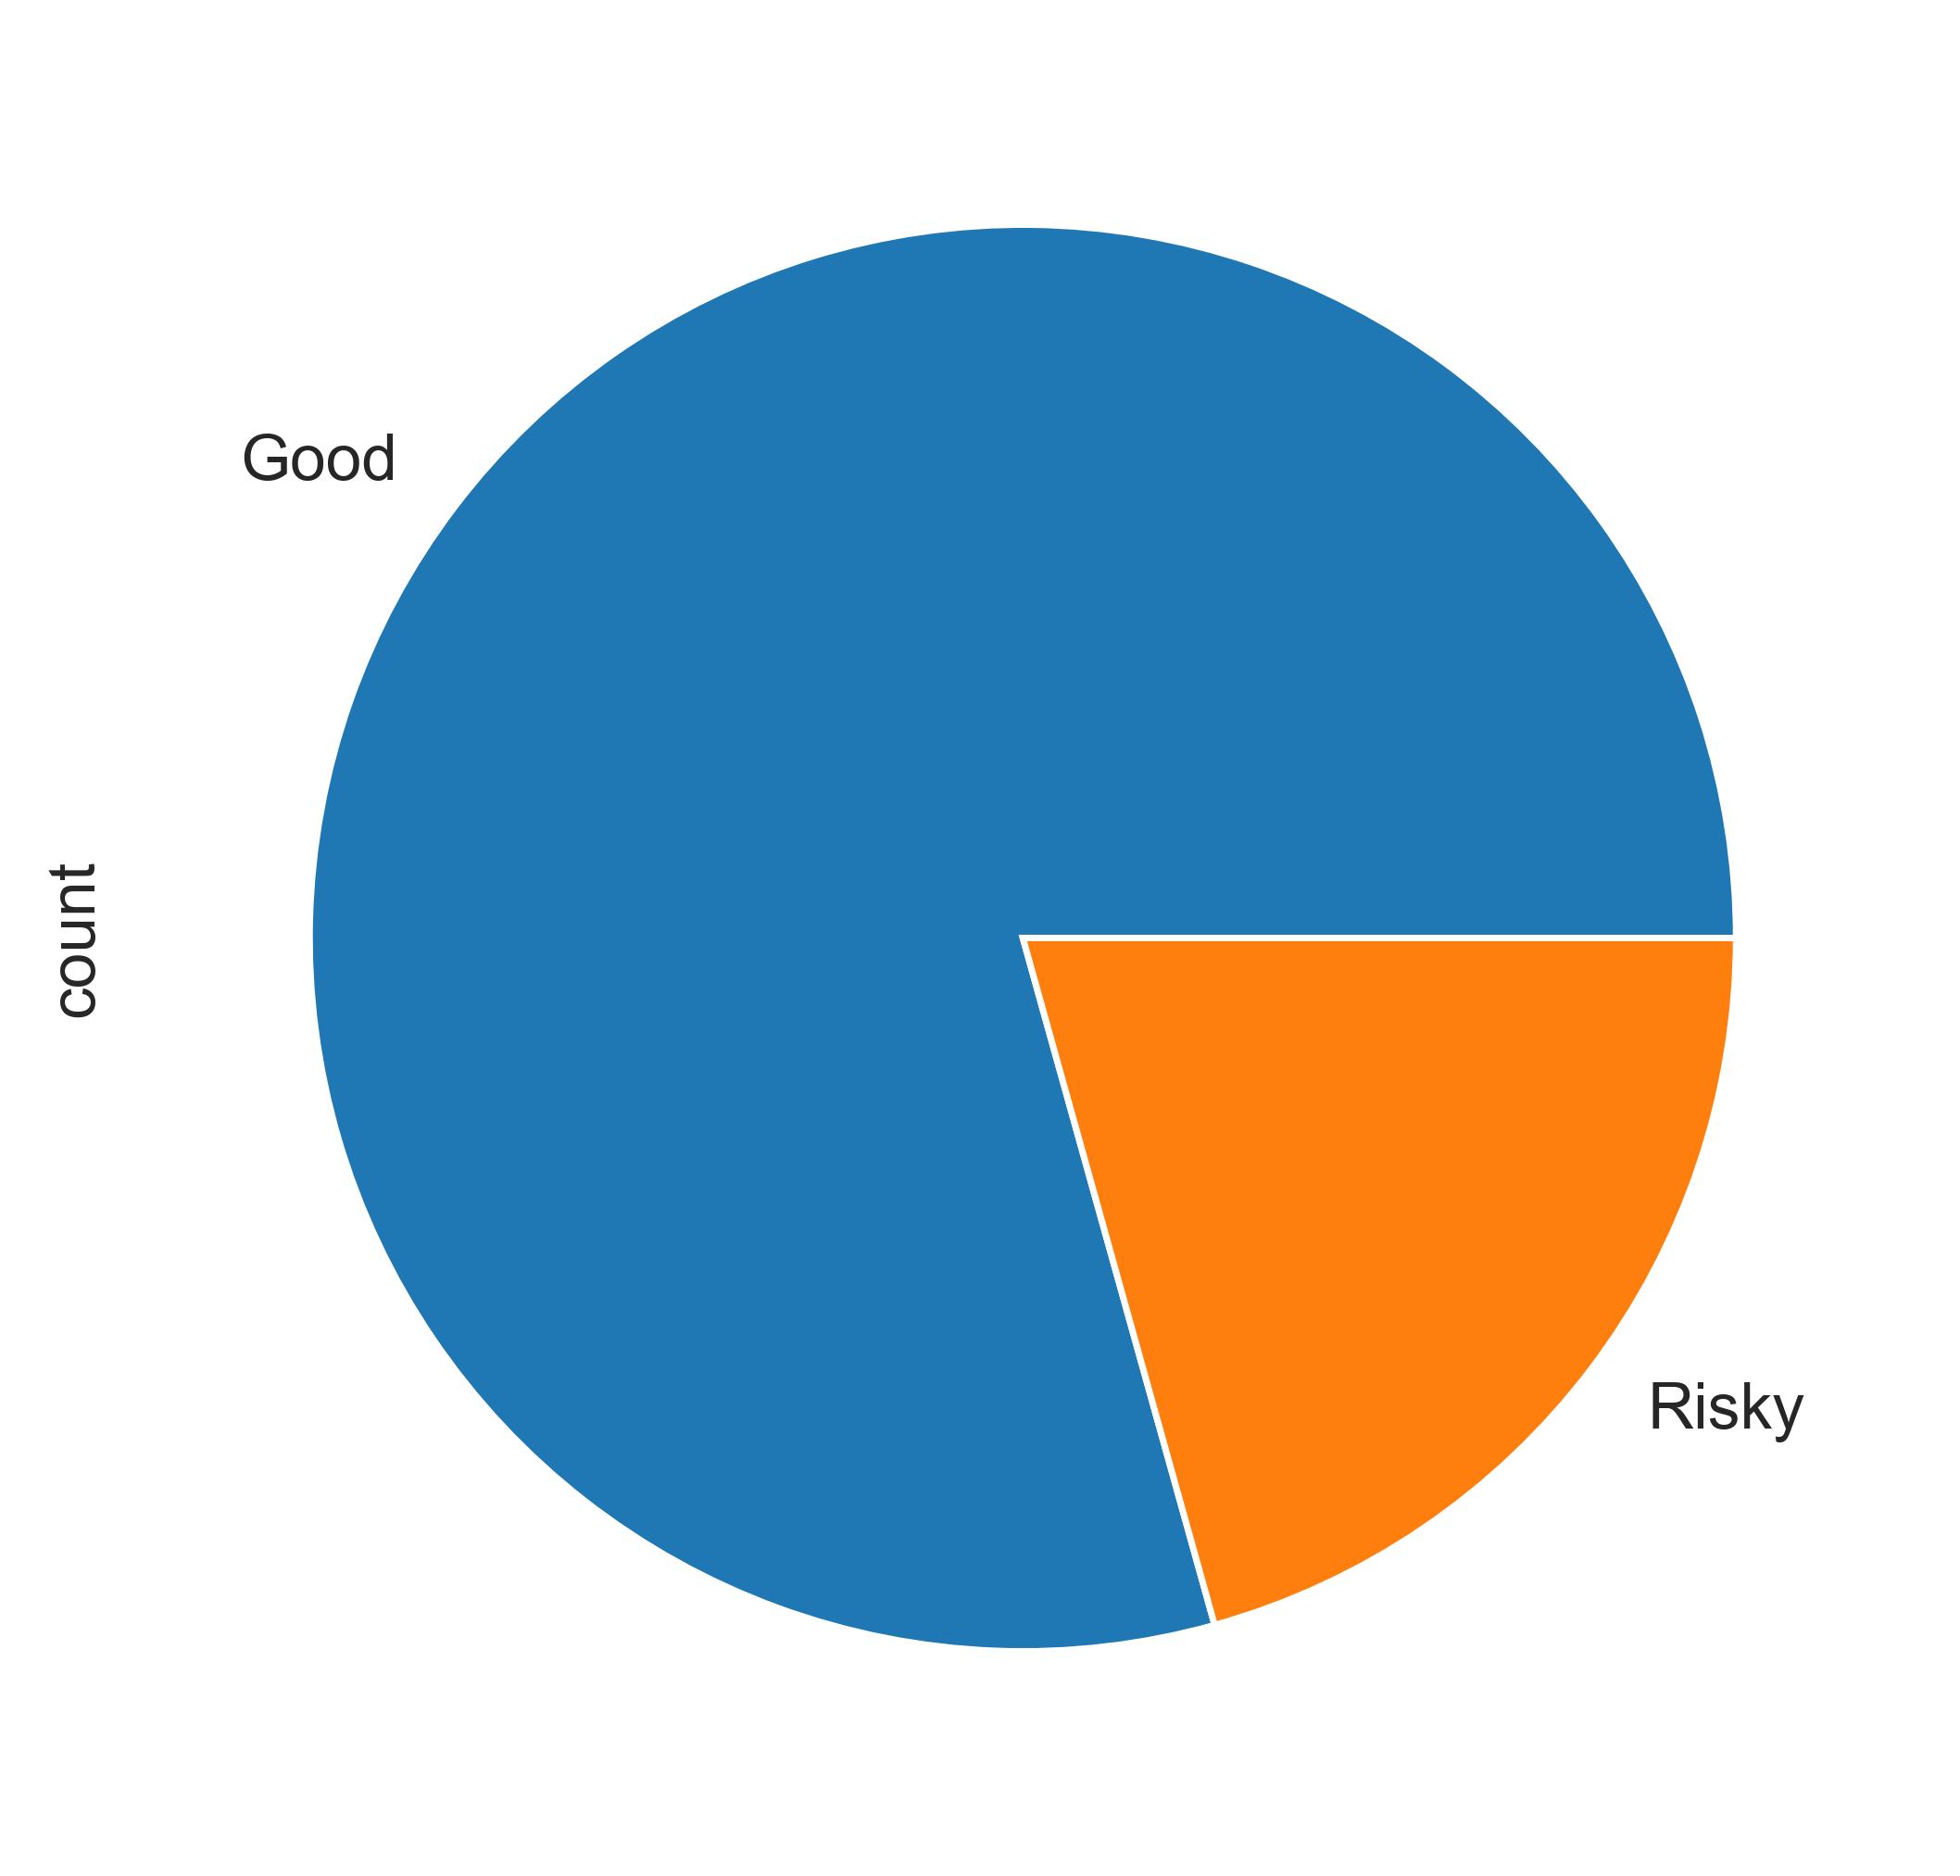

In [12]:
df['Target'].value_counts().plot(kind='pie')

<Axes: xlabel='TaxableIncome', ylabel='Count'>

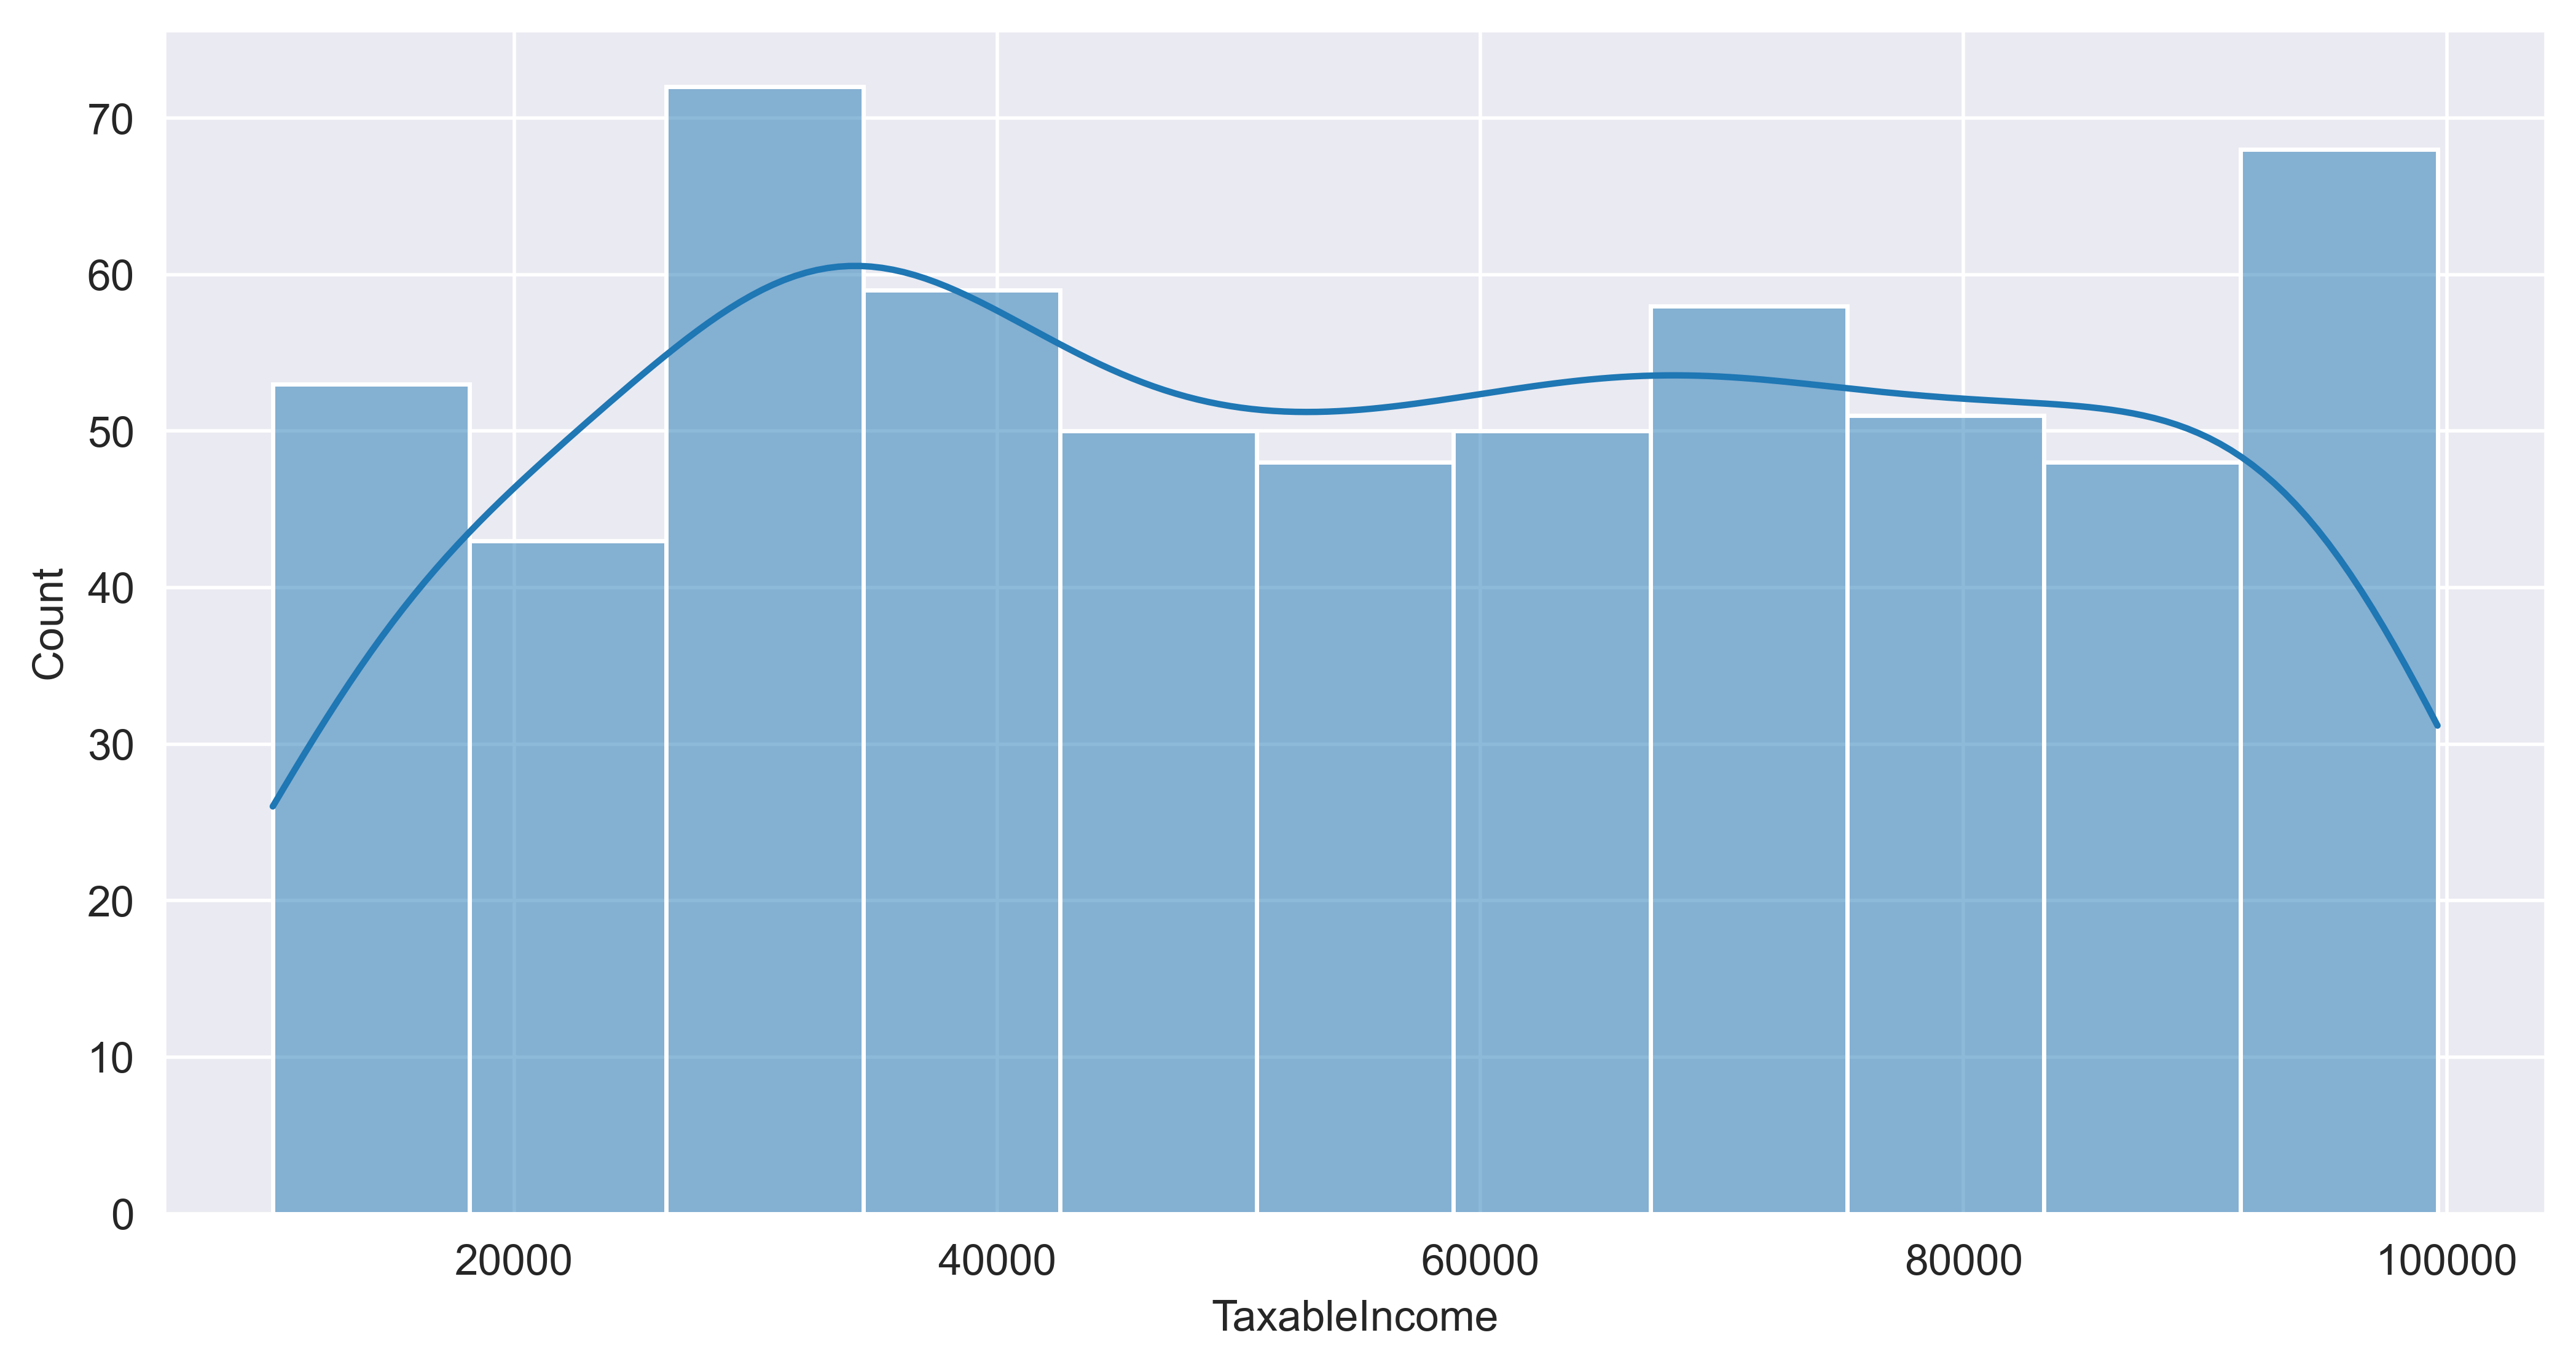

In [13]:
sns.histplot(df['TaxableIncome'],kde=True)

# 4 - Decision Tree

_<span style="color:; font-family: Arial;">No need to perform scaling since Decision tree doesnot perform any distance calculation</span>_

In [14]:
# split the feature and target
X = df.drop('Target',axis=1)
Y = df['Target']

In [15]:
oe = OrdinalEncoder()
X[['Undergrad','MaritalStatus','Urban']] = oe.fit_transform(X[['Undergrad','MaritalStatus','Urban']])

In [16]:
# split train test 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

<h3 style="color:black; font-family: Arial;">Note: There are 2 types in decision tree, we will look for both of them</h3>

<h2 style="color:black; font-family: Arial;">C5.0</h2>

In [17]:
dt_c5 = DecisionTreeClassifier(criterion='entropy').fit(xtrain,ytrain)

In [18]:
print('Test Report')
print(classification_report(ytest,dt_c5.predict(xtest)))

Test Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [19]:
print('Train Report')
print(classification_report(ytrain,dt_c5.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [20]:
print('Training accuracy: ', dt_c5.score(xtrain,ytrain))
print('Testing Accuracy: ', dt_c5.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [21]:
# perform predictions 
ypred = dt_c5.predict(xtest)
ypred

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

Text(0.5, 1.0, 'Confusion Matrix')

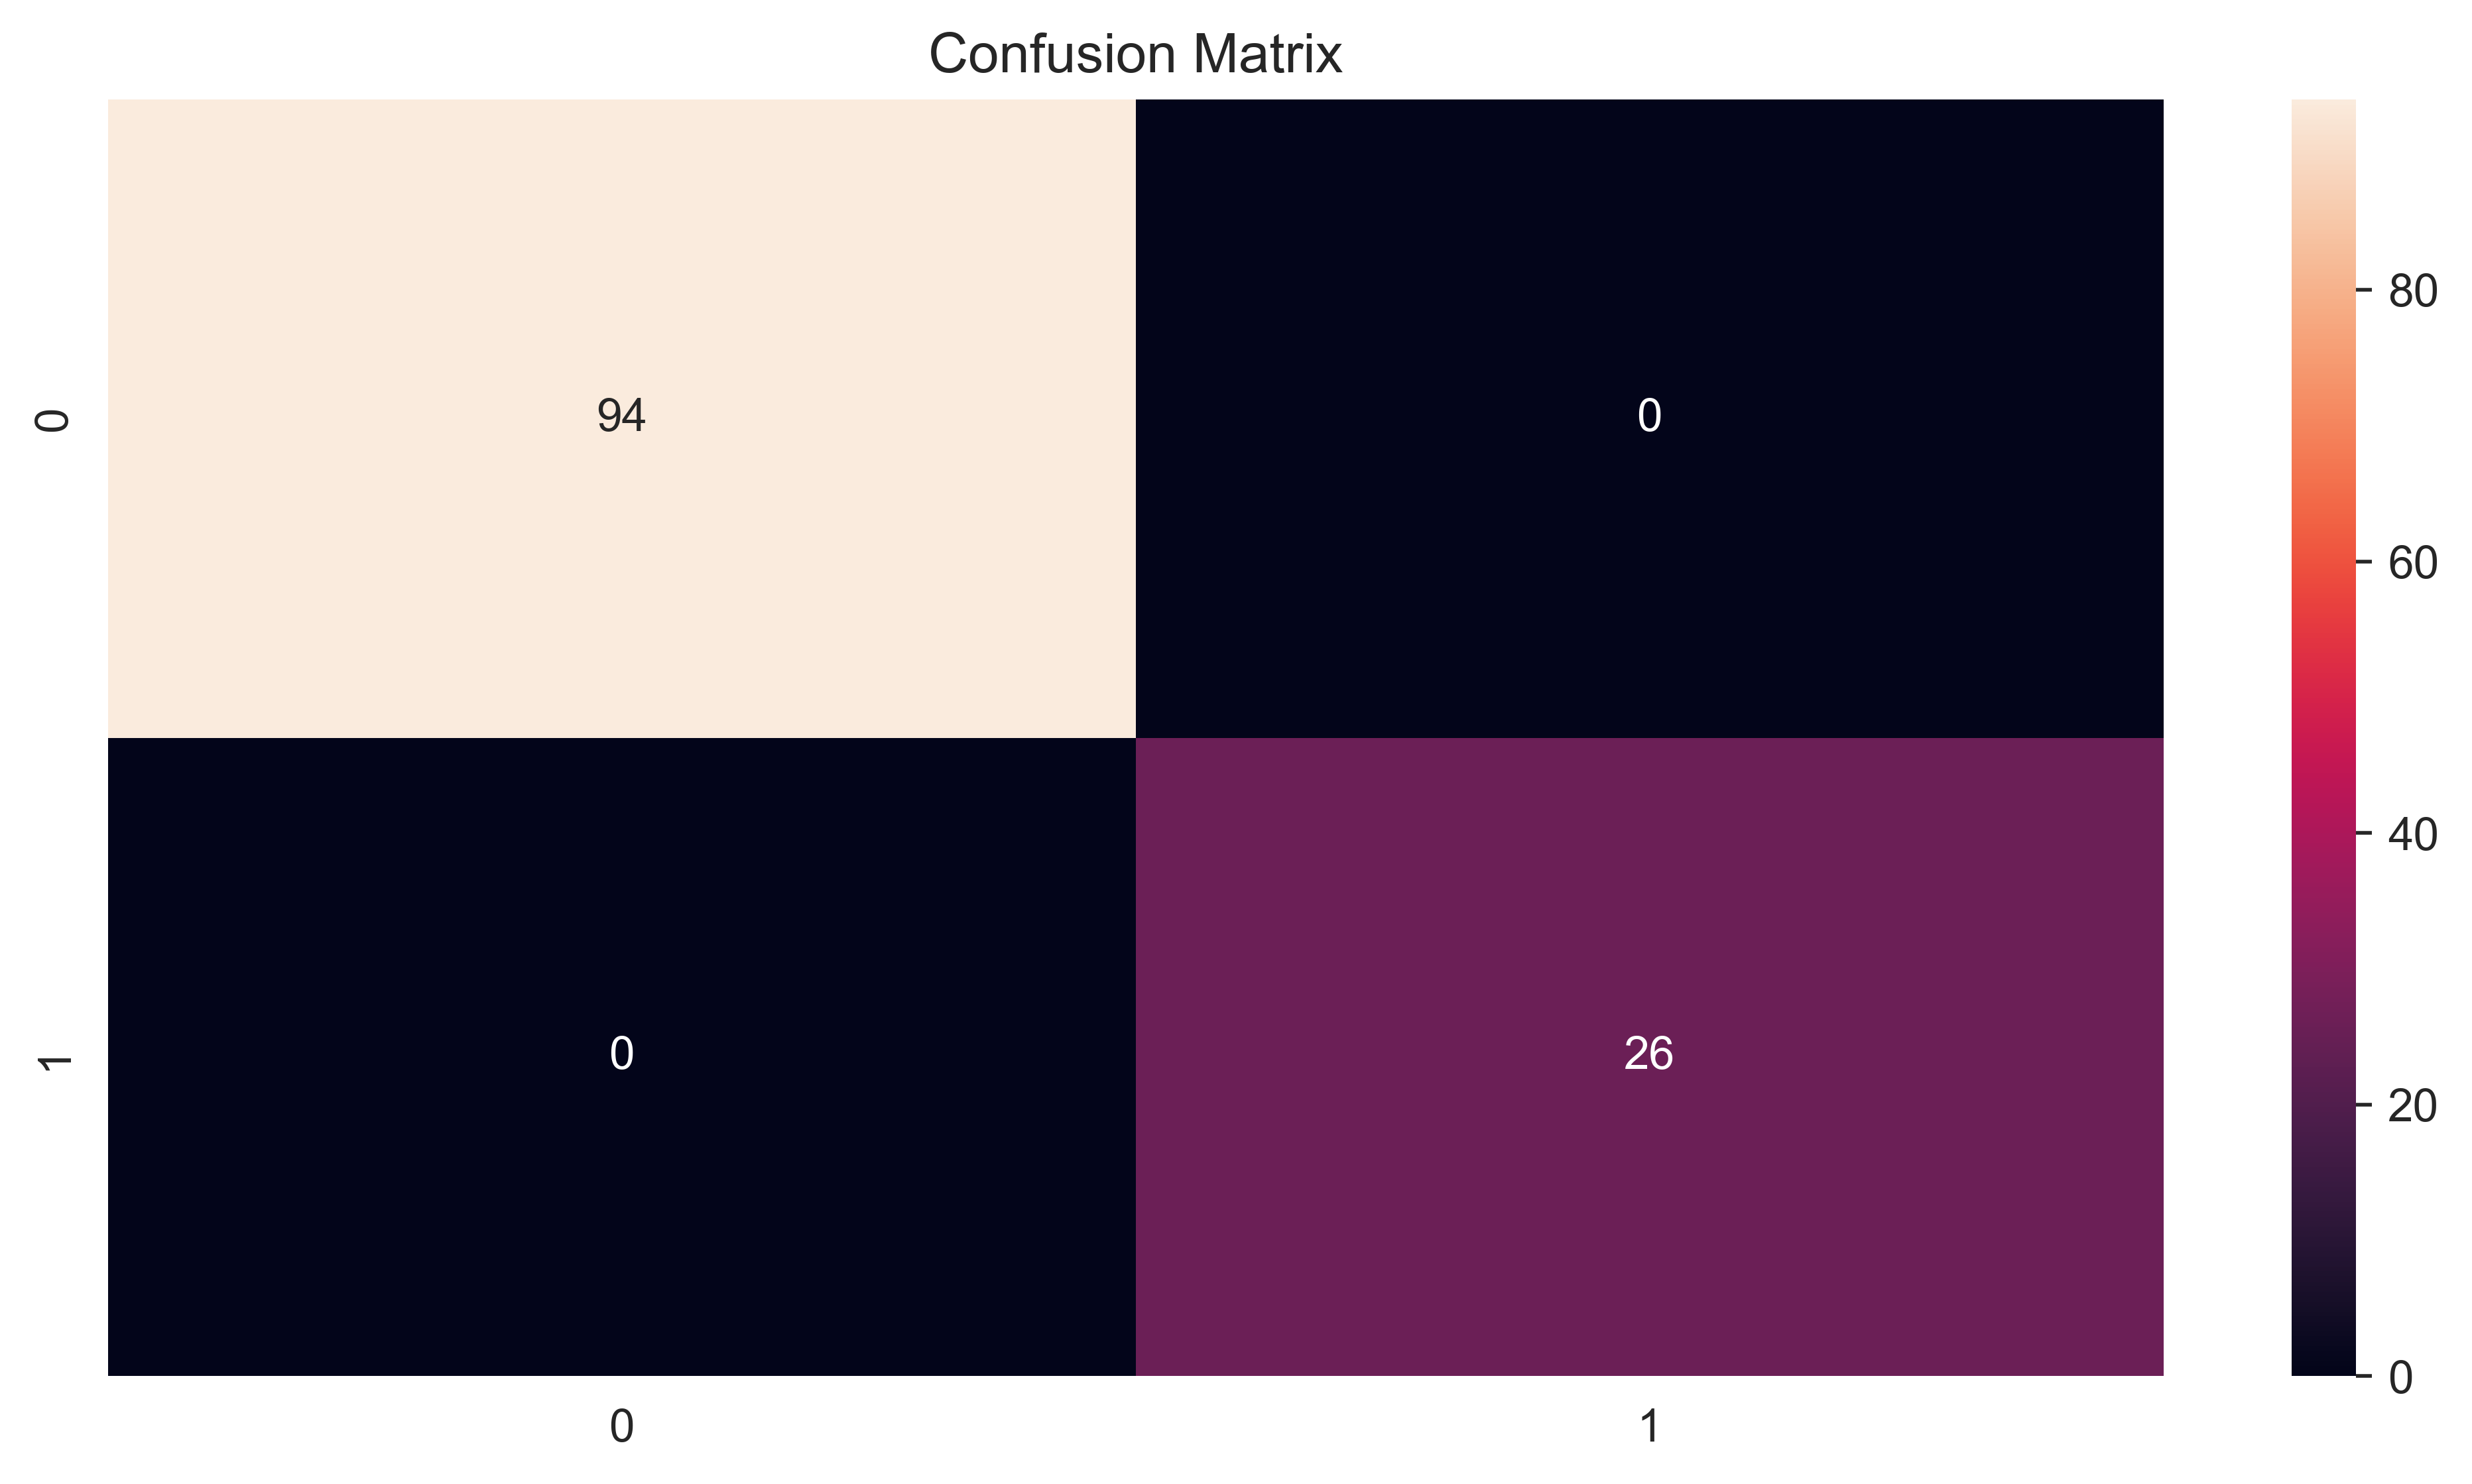

In [25]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')

In [28]:
from sklearn.tree import plot_tree

In [30]:
# Convert the Index objects to lists
feature_names_list = X.columns.tolist()
class_names_list = df['Target'].unique().tolist()

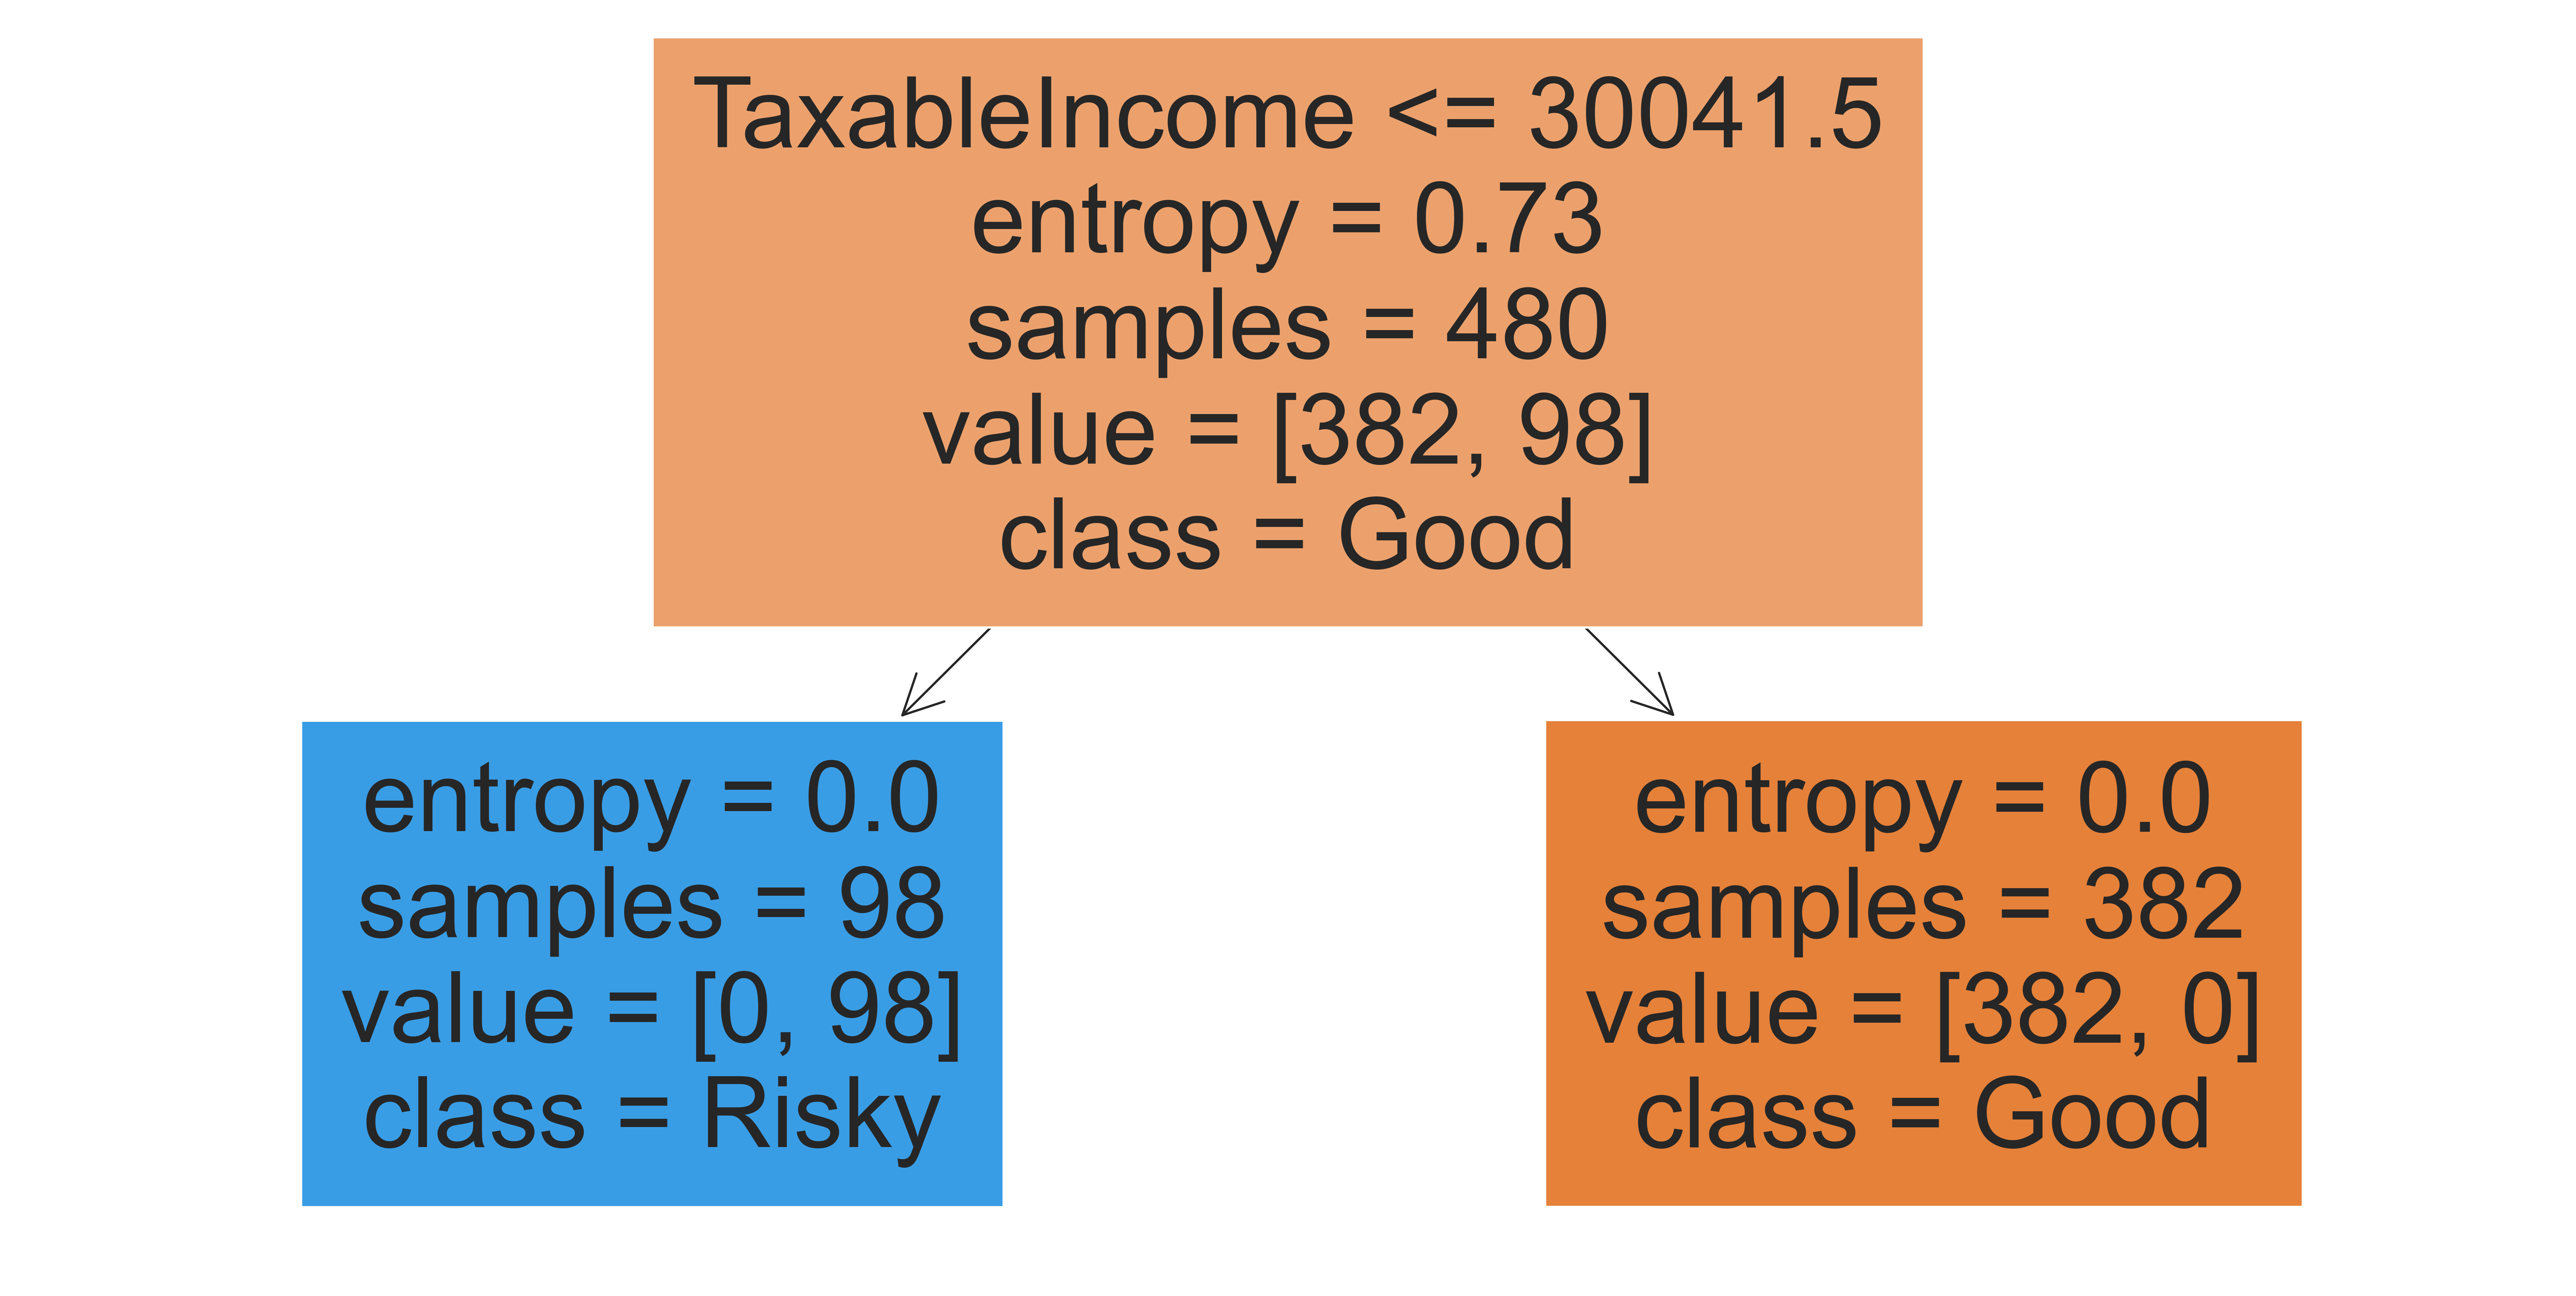

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(dt_cart, feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()

<h3 style="color:black; font-family: Arial;">CART</h3>

In [32]:
dt_cart = DecisionTreeClassifier(criterion='gini').fit(xtrain,ytrain)

In [33]:
print('Training accuracy: ', dt_cart.score(xtrain,ytrain))
print('Testing Accuracy: ', dt_cart.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [34]:
print('Test Report')
print(classification_report(ytest,dt_cart.predict(xtest)))

Test Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [35]:
print('Train Report')
print(classification_report(ytrain,dt_cart.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [36]:
# perform predictions 
ypred = dt_cart.predict(xtest)
ypred

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

Text(0.5, 1.0, 'Confusion Matrix')

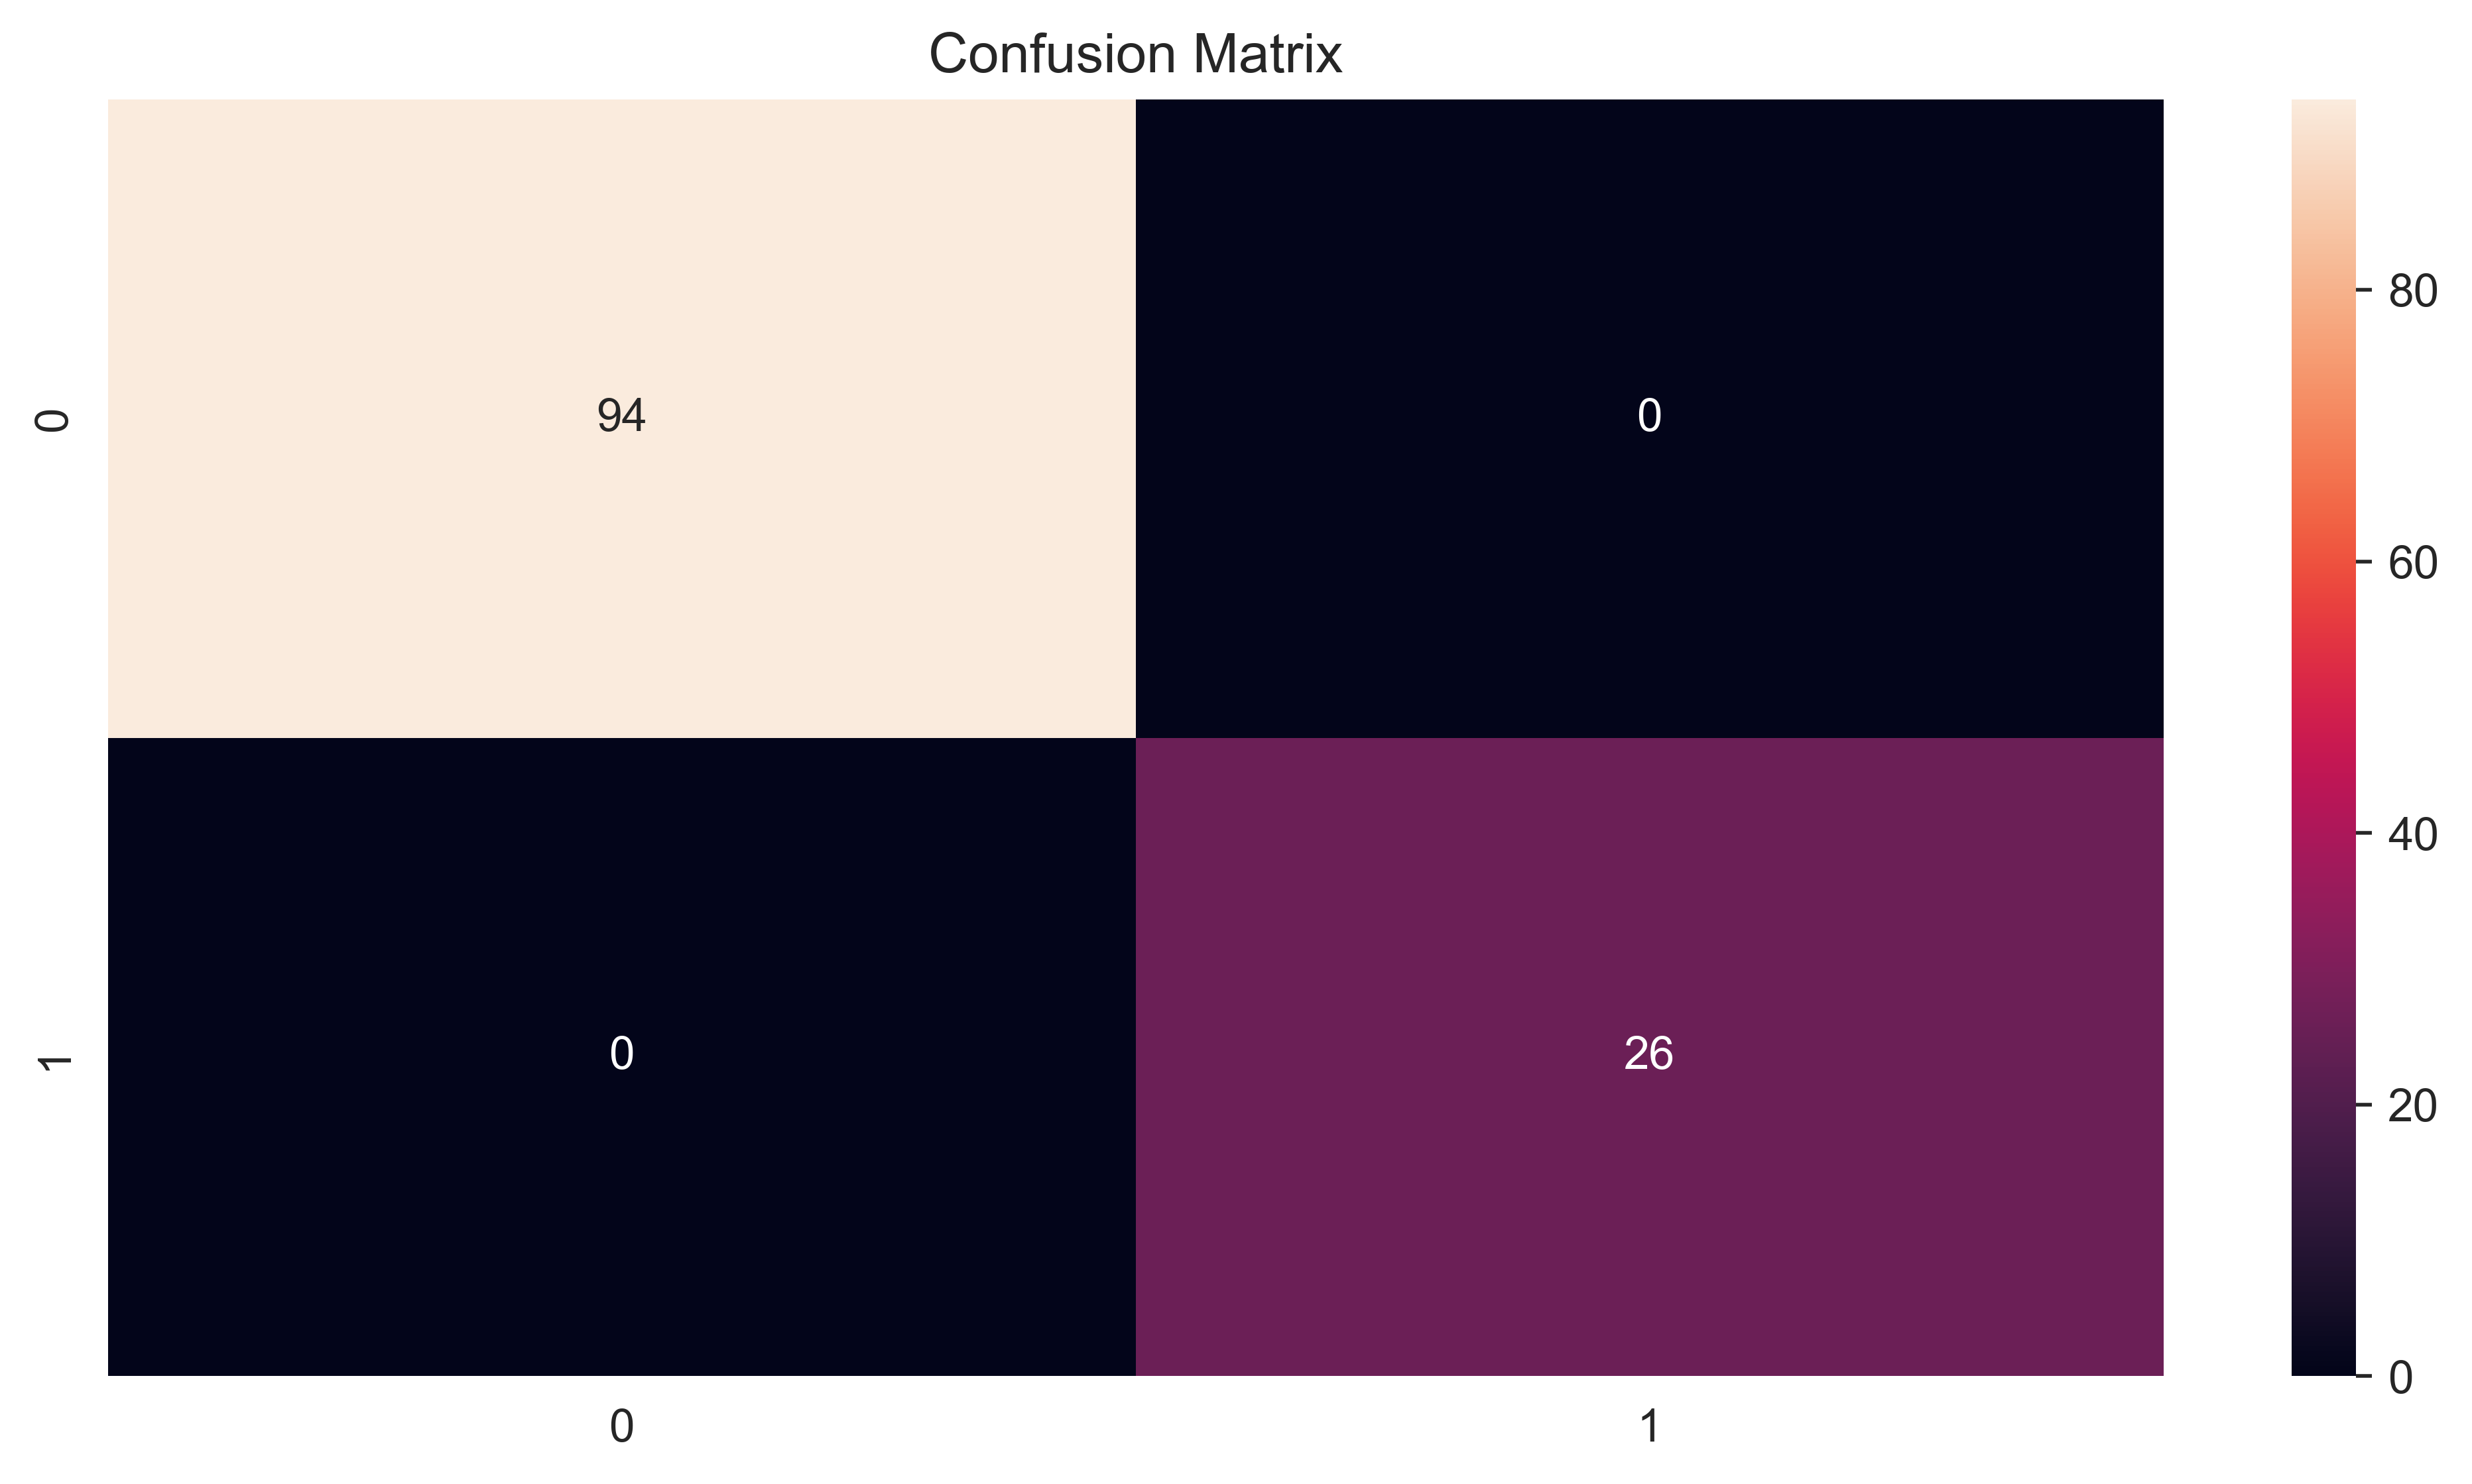

In [37]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')

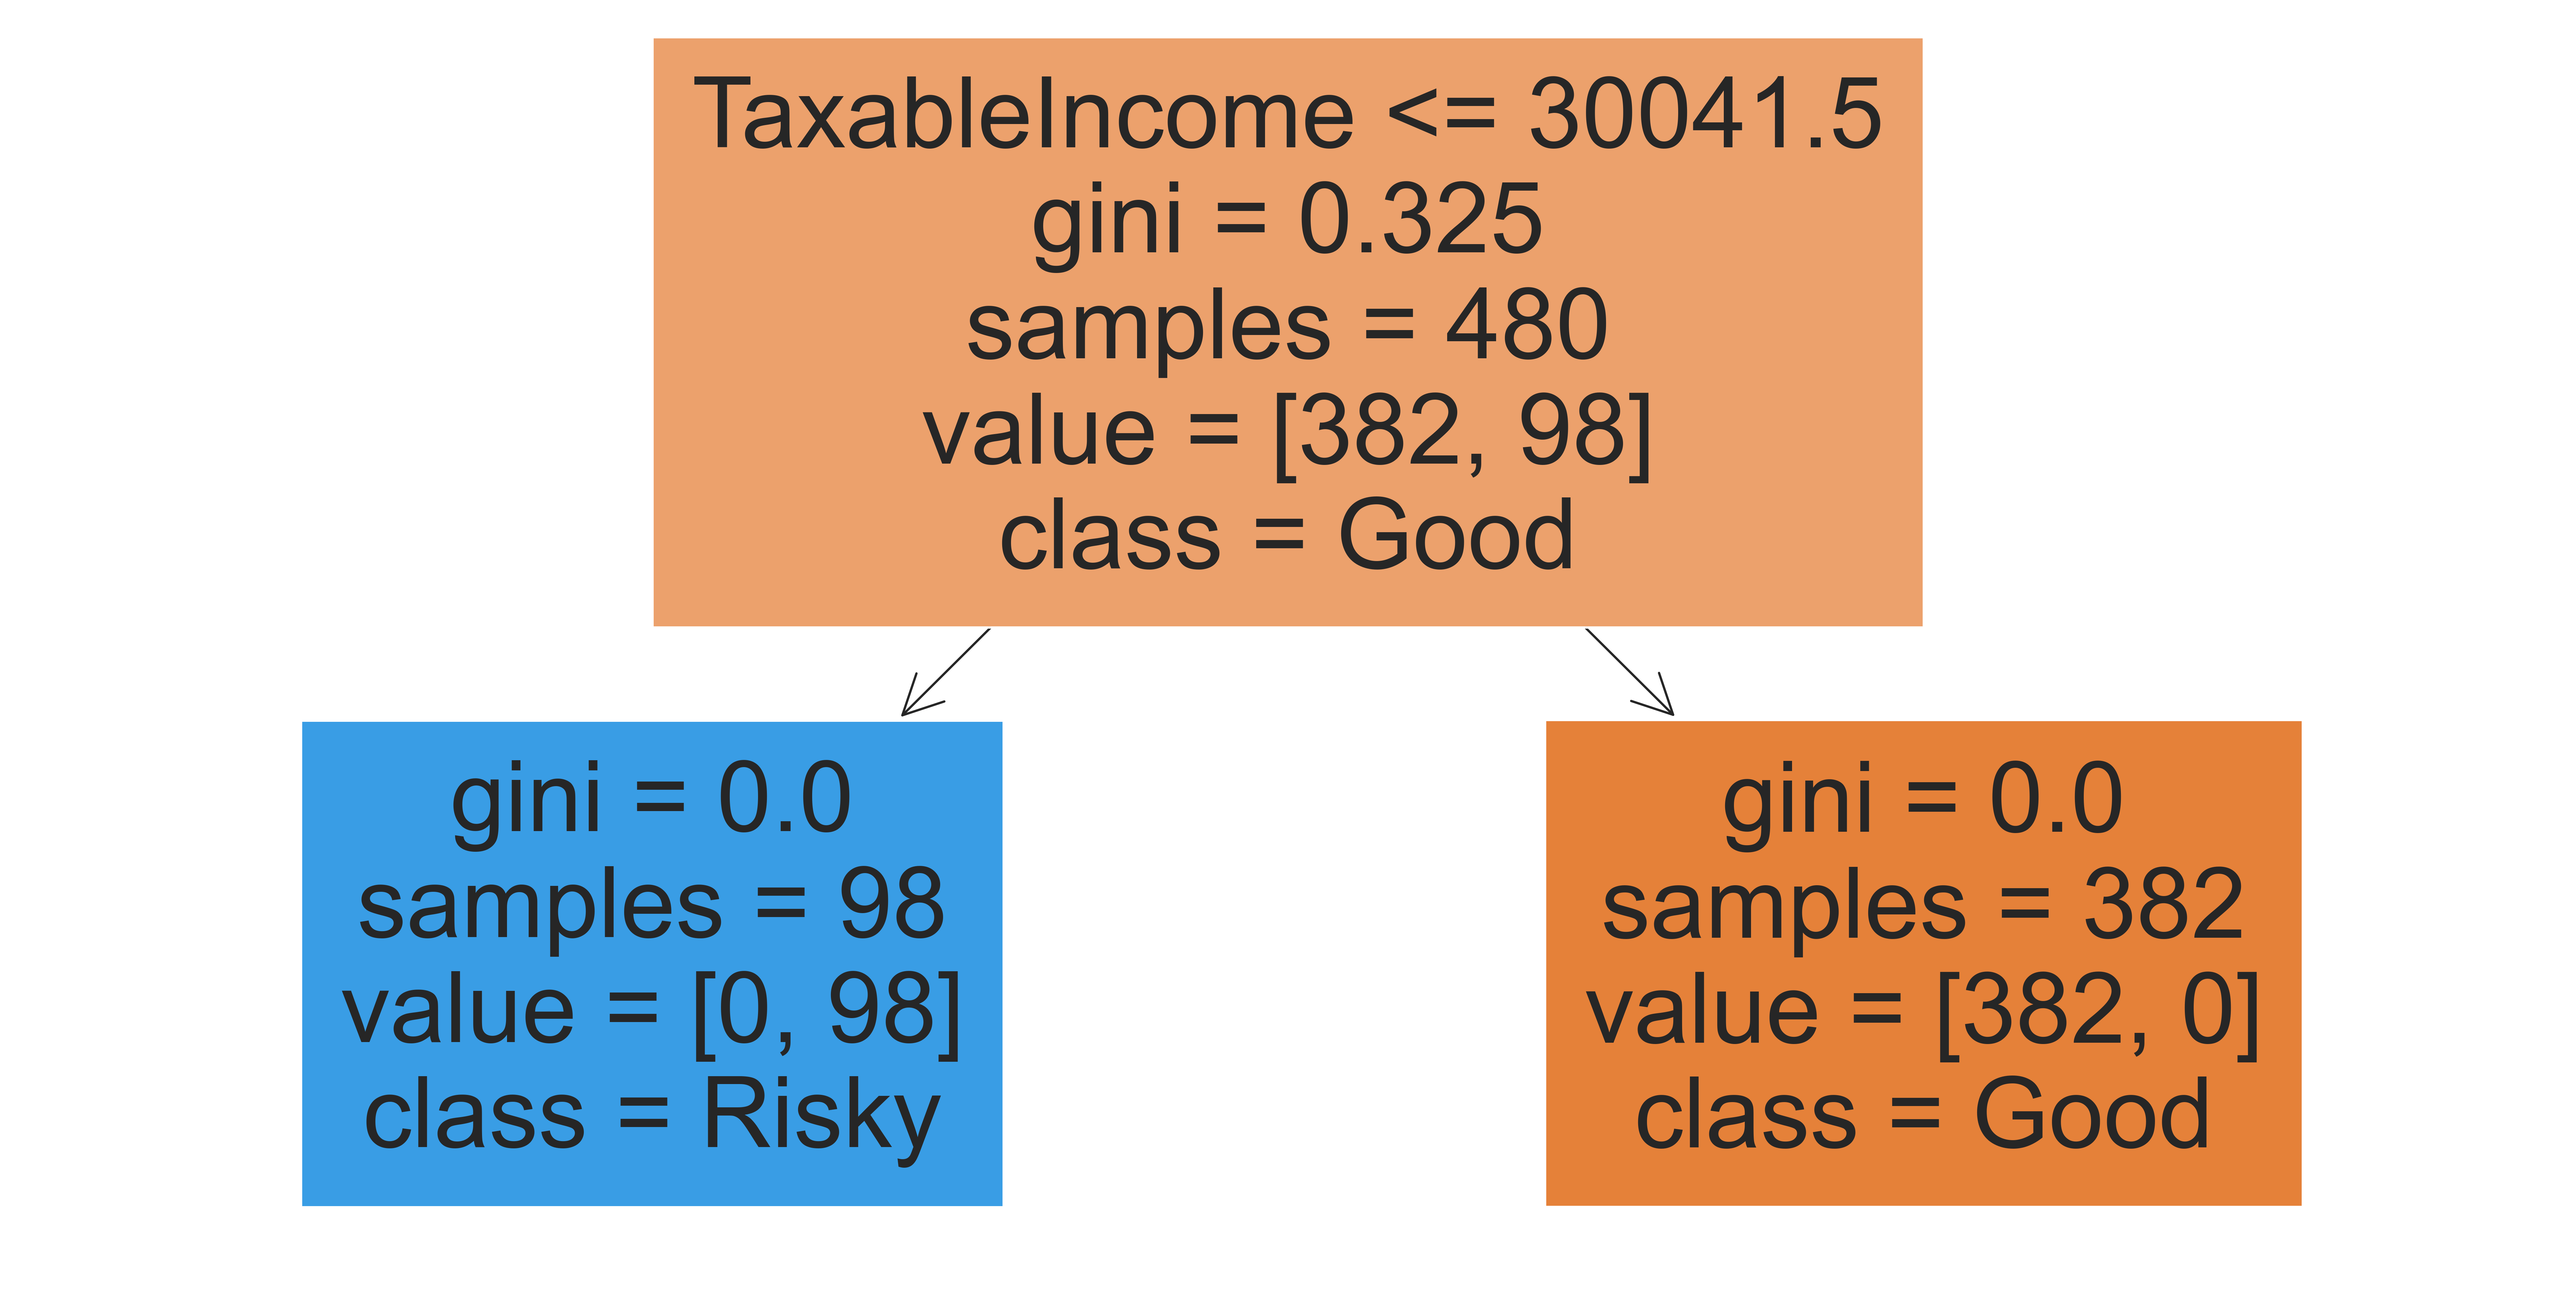

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(dt_cart, feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()